# Consolidate the Data

In [29]:
import pandas as pd

# Specify the file names
file_names = ["prices_round_2_day_-1.csv", "prices_round_2_day_0.csv", "prices_round_2_day_1.csv"]

# Initialize an empty list to store DataFrames
dfs = []

# Iterate through the file names
for file_name in file_names:
    # Read each CSV file with semicolon delimiter and append it to the list of DataFrames
    df = pd.read_csv(file_name, delimiter=';')
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
consolidated_df = pd.concat(dfs, ignore_index=True)

# Check the columns of the consolidated DataFrame
print(consolidated_df.columns)

Index(['timestamp', 'ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF',
       'IMPORT_TARIFF', 'SUNLIGHT', 'HUMIDITY', 'DAY'],
      dtype='object')


# Find important Columns

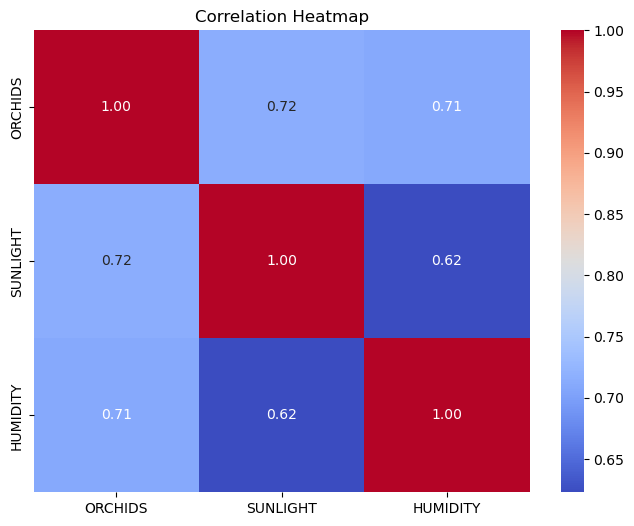

In [27]:
columns_of_interest = ["ORCHIDS", "SUNLIGHT", "HUMIDITY"]
relevant_data = consolidated_df[columns_of_interest]

# Calculate correlation coefficients
correlation_matrix = relevant_data.corr()

# Visualize the correlation using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Analysis on new Dataframe

In [28]:
import pandas as pd

# Assuming 'consolidated_df' contains the original dataframe with columns for orchids, sunlight, and humidity

# Calculate average sunlight duration
average_sunlight = 2500  # Average sunlight duration

# Determine the closer end of the ideal humidity range
ideal_humidity_lower = 60  # Lower end of the ideal humidity range
ideal_humidity_higher = 80  # Higher end of the ideal humidity range

# Calculate absolute differences between observed values and averages/ideal values
sunlight_difference = abs(consolidated_df['SUNLIGHT'] - average_sunlight)
humidity_difference = abs(consolidated_df['HUMIDITY'] - ideal_humidity_lower)
humidity_difference_above = abs(consolidated_df['HUMIDITY'] - ideal_humidity_higher)

# For each observation, determine the closer end of the ideal humidity range
consolidated_df['Ideal_Humidity'] = ideal_humidity_lower
consolidated_df.loc[consolidated_df['HUMIDITY'] > ideal_humidity_higher, 'Ideal_Humidity'] = ideal_humidity_higher

# Calculate the absolute difference based on humidity range
consolidated_df['Humidity_Difference'] = 0  # Initialize with zeros
consolidated_df.loc[consolidated_df['HUMIDITY'] < ideal_humidity_lower, 'Humidity_Difference'] = humidity_difference
consolidated_df.loc[consolidated_df['HUMIDITY'] > ideal_humidity_higher, 'Humidity_Difference'] = humidity_difference_above

# Create the new dataframe with specified columns
new_df = consolidated_df[['ORCHIDS', 'SUNLIGHT', 'HUMIDITY', 'Sunlight_Difference', 'Humidity_Difference', 'Ideal_Humidity']]

# Display the new dataframe
print(new_df)

KeyError: "['Sunlight_Difference'] not in index"

In [12]:
print(consolidated_df)

       timestamp  ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
0              0  1200.00             1.5           10.5           -2.0   
1            100  1201.75             1.5            9.5           -2.0   
2            200  1201.75             1.5            9.5           -2.0   
3            300  1201.75             1.5            9.5           -2.0   
4            400  1201.75             1.5            9.5           -2.0   
...          ...      ...             ...            ...            ...   
29998     999600  1036.25             0.9            9.5           -5.0   
29999     999700  1036.25             0.9            9.5           -5.0   
30000     999800  1036.25             0.9            9.5           -5.0   
30001     999900  1034.25             0.9            9.5           -5.0   
30002    1000000  1035.25             0.9            9.5           -5.0   

        SUNLIGHT  HUMIDITY  DAY  Ideal_Humidity  Humidity_Difference  
0      2500.0000  79.00000  

# Cost Analysis

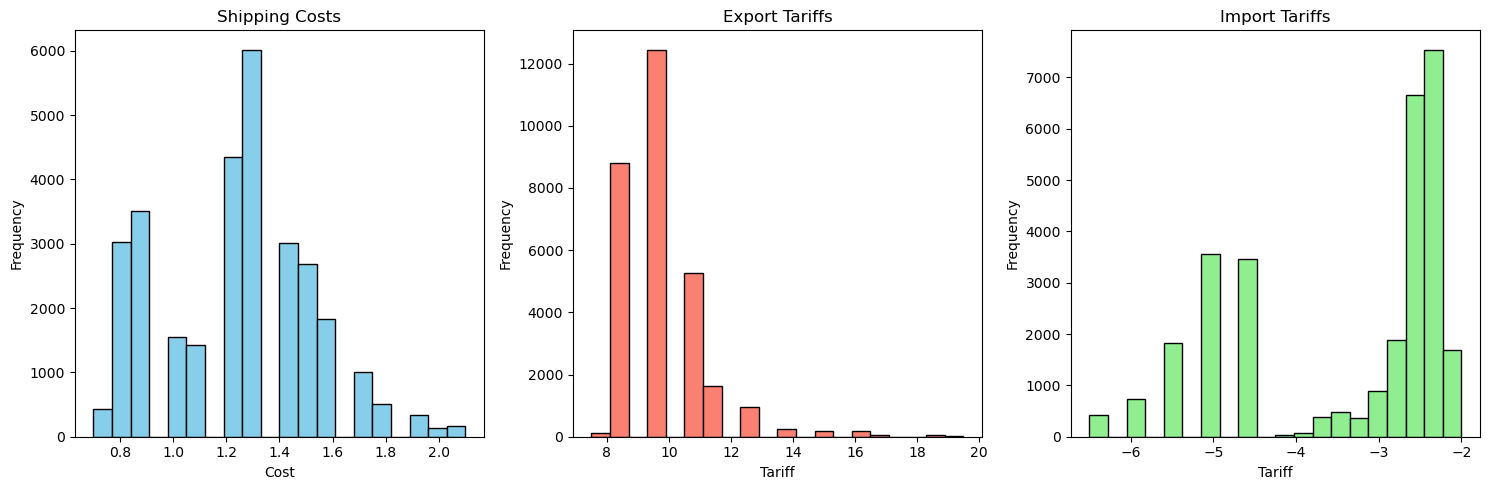

Statistics for Shipping Costs:
count    30003.000000
mean         1.237043
std          0.287521
min          0.700000
25%          1.000000
50%          1.300000
75%          1.400000
max          2.100000
Name: TRANSPORT_FEES, dtype: float64

Statistics for Export Tariffs:
count    30003.000000
mean         9.728044
std          1.368582
min          7.500000
25%          8.500000
50%          9.500000
75%         10.500000
max         19.500000
Name: EXPORT_TARIFF, dtype: float64

Statistics for Import Tariffs:
count    30003.000000
mean        -3.405143
std          1.235526
min         -6.500000
25%         -4.500000
50%         -2.600000
75%         -2.400000
max         -2.000000
Name: IMPORT_TARIFF, dtype: float64


In [28]:
import matplotlib.pyplot as plt

# Create subplots for the histograms
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Histogram for shipping costs
axs[0].hist(consolidated_df['TRANSPORT_FEES'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Shipping Costs')
axs[0].set_xlabel('Cost')
axs[0].set_ylabel('Frequency')

# Histogram for export tariffs
axs[1].hist(consolidated_df['EXPORT_TARIFF'], bins=20, color='salmon', edgecolor='black')
axs[1].set_title('Export Tariffs')
axs[1].set_xlabel('Tariff')
axs[1].set_ylabel('Frequency')

# Histogram for import tariffs
axs[2].hist(consolidated_df['IMPORT_TARIFF'], bins=20, color='lightgreen', edgecolor='black')
axs[2].set_title('Import Tariffs')
axs[2].set_xlabel('Tariff')
axs[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the histograms
plt.show()


# Basic statistics for shipping costs
print("Statistics for Shipping Costs:")
print(consolidated_df['TRANSPORT_FEES'].describe())
print()

# Basic statistics for export tariffs
print("Statistics for Export Tariffs:")
print(consolidated_df['EXPORT_TARIFF'].describe())
print()

# Basic statistics for import tariffs
print("Statistics for Import Tariffs:")
print(consolidated_df['IMPORT_TARIFF'].describe())

# Trade Analysis

In [30]:
# Buy conditions
buy_condition = (consolidated_df['SUNLIGHT'] > 2500) & (consolidated_df['HUMIDITY'].between(60, 80))

# Sell conditions
sell_condition = (consolidated_df['SUNLIGHT'] < 2500) & (~consolidated_df['HUMIDITY'].between(60, 80))

# Count the number of timestamps that satisfy buy conditions
num_buy_timestamps = buy_condition.sum()

# Count the number of timestamps that satisfy sell conditions
num_sell_timestamps = sell_condition.sum()

# Total number of timestamps
total_timestamps = len(consolidated_df)

# Print the results
print("Number of timestamps for buying:", num_buy_timestamps)
print("Number of timestamps for selling:", num_sell_timestamps)
print("Total number of timestamps:", total_timestamps)

# Calculate the ratio of time for buying
buy_ratio = num_buy_timestamps / total_timestamps

# Calculate the ratio of time for selling
sell_ratio = num_sell_timestamps / total_timestamps

# Print the results
print("Ratio of time for buying:", buy_ratio)
print("Ratio of time for selling:", sell_ratio)

Number of timestamps for buying: 3972
Number of timestamps for selling: 2787
Total number of timestamps: 30003
Ratio of time for buying: 0.13238676132386762
Ratio of time for selling: 0.0928907109289071


# Total Profits

In [4]:
import csv

# input_file = 'v2_success.log'
input_file = 'results.log'
output_file = 'results.csv'

# Set to True when inside the Activities log section
inside_activities_log = False

# Define the headers for the CSV file
headers = ['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1', 'bid_price_2', 'bid_volume_2',
           'bid_price_3', 'bid_volume_3', 'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2',
           'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss']
count = 0

# Open the input log file and output CSV file
with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
    # Create a CSV writer object
    writer = csv.writer(outfile)
    
    # Write the headers to the CSV file
    writer.writerow(headers)
    
    # Read each line from the log file
    for line in infile:
        # Check if the line contains the start of the "Activities log" section
        if line.strip() == "Activities log:":
            inside_activities_log = True
            continue
        
        # Check if the line contains the end of the "Activities log" section
        elif line.strip() == "Trade History:" or line.strip() == "Sandbox logs:":
            inside_activities_log = False
            continue
        
        # Skip over empty lines
        elif not line.strip():
            continue
        
        # If inside the "Activities log" section, write the line to the CSV file
        elif inside_activities_log:
            if count > 0:
                # Split the line into fields based on the delimiter (;)
                fields = line.strip().split(';')

                # Write the fields to the CSV file
                writer.writerow(fields)
            count += 1

print("CSV file created successfully.")

CSV file created successfully.


In [5]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('results.csv')

# Get unique product names
unique_products = df['product'].unique()

# Create an empty dictionary to store DataFrames for each product
product_dfs = {}

# Iterate over unique product names
for product in unique_products:
    # Filter the original DataFrame for the current product
    product_df = df[df['product'] == product].copy()
    # Reset index to avoid any index conflicts
    product_df.reset_index(drop=True, inplace=True)
    # Store the DataFrame in the dictionary with the product name as key
    product_dfs[product] = product_df

# Access DataFrames for individual products using their names
amethysts_df = product_dfs['AMETHYSTS']
starfruit_df = product_dfs['STARFRUIT']
orchids_df = product_dfs['ORCHIDS']

In [6]:
# Calculate total profit for each commodity
total_profit_amethysts = amethysts_df['profit_and_loss'].sum()
total_profit_starfruit = starfruit_df['profit_and_loss'].sum()
total_profit_orchids = orchids_df['profit_and_loss'].sum()

# Calculate total profit
total_profit = total_profit_amethysts + total_profit_starfruit + total_profit_orchids

print("Total profit for Amethysts:", total_profit_amethysts)
print("Total profit for Starfruit:", total_profit_starfruit)
print("Total profit for Orchids:", total_profit_orchids)
print("Total profit for all commodities:", total_profit)

Total profit for Amethysts: 68902616.0
Total profit for Starfruit: 74802714.42626953
Total profit for Orchids: 354420343.2133789
Total profit for all commodities: 498125673.63964844


# Arbitraging

In [66]:
import pandas as pd
import re

# Define a function to parse the data logs
def parse_logs_from_file(file_path):
    parsed_data = []
    timestamp = 100
    with open(file_path, "r") as file:
        for line in file:
            # Check if the line contains bid and ask prices
            if '"lambdaLog":' in line:
                # Extract bid and ask prices
                bid_match = re.search(r"Bid Price:\s*(-?\d+\.\d+)", line)
                ask_match = re.search(r"Ask Price:\s*(-?\d+\.\d+)", line)
                import_tariff_match = re.search(r"Import Tariff:\s*(-?\d+\.\d+)", line)
                transport_fees_match = re.search(r"Transport Fees:\s*(-?\d+\.\d+)", line)
                export_fees_match = re.search(r"Export Fees:\s*(-?\d+\.\d+)", line)
                
                if bid_match and ask_match:
                    bid_price = float(bid_match.group(1))
                    ask_price = float(ask_match.group(1))
                    import_tariff = float(import_tariff_match.group(1)) if import_tariff_match else None
                    transport_fees = float(transport_fees_match.group(1)) if transport_fees_match else None
                    export_fees = float(export_fees_match.group(1)) if export_fees_match else None
                    
                    parsed_data.append({
                        "Timestamp": timestamp,
                        "Bid Price": bid_price,
                        "Ask Price": ask_price,
                        "Import Tariff": import_tariff,
                        "Transport Fees": transport_fees,
                        "Export Fees": export_fees,
                        "mid_price": (bid_price + ask_price) / 2
                    })
                    timestamp += 100  # Increment timestamp by 100
    return parsed_data

# File path containing the logs
file_path = "observations.log"

# Parse the logs and create a DataFrame
observations_df = pd.DataFrame(parse_logs_from_file(file_path))

observations_df['Buy Price'] = observations_df['Ask Price'] + observations_df['Import Tariff'] + observations_df['Transport Fees']
observations_df['Sell Price'] = observations_df['Bid Price'] - observations_df['Export Fees'] - observations_df['Transport Fees']
print(observations_df)

     Timestamp  Bid Price  Ask Price  Import Tariff  Transport Fees  \
0          100     1054.0     1055.5           -2.0             1.0   
1          200     1054.0     1055.5           -2.0             1.0   
2          300     1054.5     1056.0           -2.0             1.0   
3          400     1055.5     1057.0           -2.0             1.0   
4          500     1056.0     1057.5           -2.0             1.0   
..         ...        ...        ...            ...             ...   
994      99500     1047.0     1049.0           -4.0             1.1   
995      99600     1050.5     1052.0           -4.0             1.1   
996      99700     1050.5     1052.0           -4.0             1.1   
997      99800     1050.5     1052.5           -4.0             1.1   
998      99900     1050.5     1052.0           -4.0             1.1   

     Export Fees  mid_price  Buy Price  Sell Price  
0            8.0    1054.75     1054.5      1045.0  
1            8.0    1054.75     1054.5   

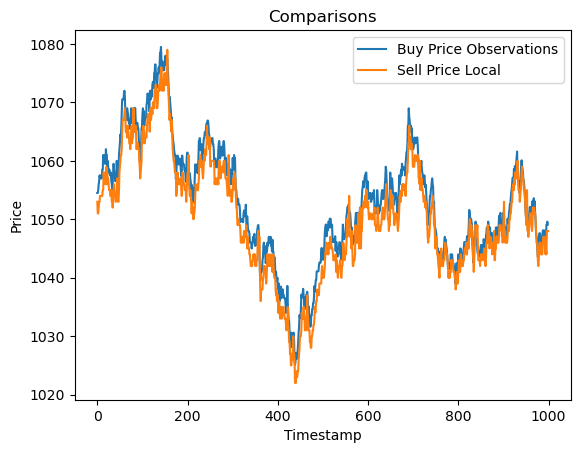

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming consolidated_df and df are already defined

# Plot the first 1000 rows of mid_price from consolidated_df
plt.plot(observations_df['Buy Price'].iloc[:1000], label='Buy Price Observations')

# Plot the selling prices
plt.plot(orchids_df['bid_price_1'].iloc[:1000], label='Sell Price Local')

# Add labels and legend
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Comparisons')
plt.legend()

# Show the plot
plt.show()

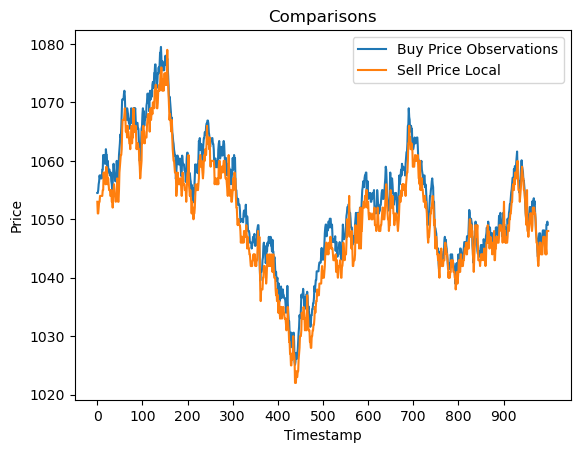

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming consolidated_df and df are already defined

# Plot the first 1000 rows of mid_price from consolidated_df
plt.plot(observations_df.index[:1000], observations_df['Buy Price'].iloc[:1000], label='Buy Price Observations')

# Plot the selling prices
plt.plot(orchids_df.index[:1000], orchids_df['bid_price_1'].iloc[:1000], label='Sell Price Local')

# Add labels and legend
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Comparisons')
plt.legend()

# Set the x-axis ticks to display every 100 timestamps
plt.xticks(observations_df.index[:1000:100])

# Show the plot
plt.show()

In [69]:
# Initialize a list to store timestamps where sell price is higher than buy price
sell_higher_than_buy_timestamps = []

# Iterate through the first 1000 timestamps
for timestamp in observations_df.index[:1000]:
    # Check if the sell price is higher than the buy price at the current timestamp
    if orchids_df['bid_price_1'].loc[timestamp] > observations_df['Buy Price'].loc[timestamp]:
        # If yes, append the timestamp to the list
        sell_higher_than_buy_timestamps.append(timestamp)

# Print the number of occurrences and the timestamps
print("Number of occurrences:", len(sell_higher_than_buy_timestamps))
print("Timestamps where sell price is higher than buy price:", sell_higher_than_buy_timestamps)

Number of occurrences: 45
Timestamps where sell price is higher than buy price: [155, 174, 202, 249, 291, 359, 360, 437, 558, 583, 715, 752, 756, 762, 777, 793, 797, 806, 816, 817, 826, 831, 833, 841, 842, 843, 865, 868, 874, 879, 897, 901, 903, 931, 932, 935, 944, 948, 952, 961, 971, 972, 975, 982, 991]


count    999.000000
mean      -2.711612
std        1.666776
min       -6.600000
25%       -4.000000
50%       -3.000000
75%       -1.600000
max        5.400000
dtype: float64
Average difference between sell price and buy price: -2.7116116116115907


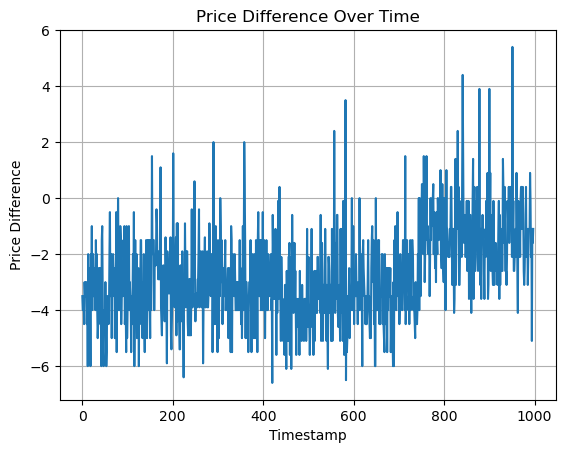

Number of times the difference is greater than -1.5: 246


In [89]:
import numpy as np

# Calculate the price difference between sell price and buy price
price_difference = orchids_df['bid_price_1'].iloc[:1000] - observations_df['Buy Price'].iloc[:1000]

# Calculate the average difference
average_difference = np.mean(price_difference)

price_difference_stats = price_difference.describe()

# Print the statistics
print(price_difference_stats)

# Print the average difference
print("Average difference between sell price and buy price:", average_difference)

# Plot the price difference
plt.plot(observations_df.index[:1000], price_difference[1:])
plt.title('Price Difference Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Price Difference')
plt.grid(True)
plt.show()

# Count how many times the difference is greater than -1.5
count_greater_than_minus_1_5 = np.sum(price_difference >= -1.5)

# Print the count
print("Number of times the difference is greater than -1.5:", count_greater_than_minus_1_5)

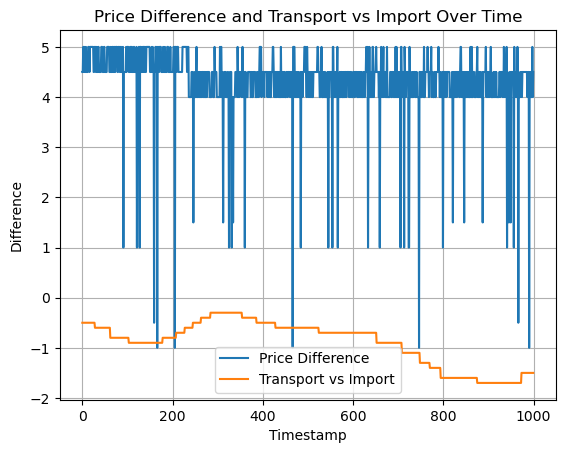

Count of Transport_vs_Import less than price difference: 997
Count of Transport_vs_Import greater than price difference: 3


In [116]:
import matplotlib.pyplot as plt

# Calculate the price difference at each timestamp
price_difference = orchids_df['ask_price_1'].iloc[:1000] - mid_price['Bid Price']

# Plot the price difference and Transport_vs_Import
plt.plot(price_difference, label='Price Difference')
plt.plot(consolidated_df['Transport_vs_Import'].iloc[:1000], label='Transport vs Import')
plt.title('Price Difference and Transport vs Import Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Difference')
plt.legend()
plt.grid(True)
plt.show()

less_than_count = (consolidated_df['Transport_vs_Import'].iloc[:1000] < price_difference).sum()
greater_than_count = (consolidated_df['Transport_vs_Import'].iloc[:1000] > price_difference).sum()

print("Count of Transport_vs_Import less than price difference:", less_than_count)
print("Count of Transport_vs_Import greater than price difference:", greater_than_count)

count    30003.000000
mean        -2.168100
std          1.449969
min         -5.700000
25%         -3.700000
50%         -1.300000
75%         -1.100000
max         -0.300000
Name: Transport_vs_Import, dtype: float64


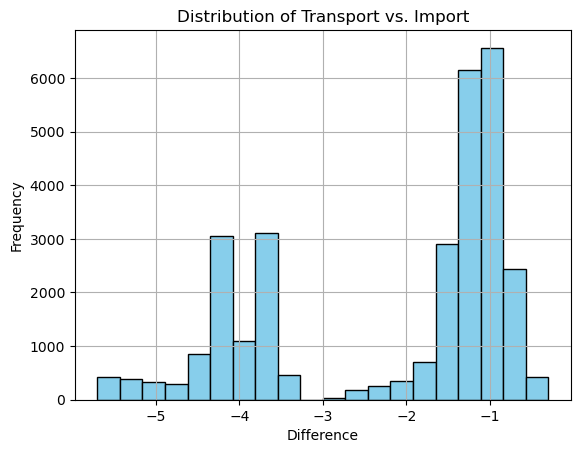

In [96]:
transport_vs_import_stats = consolidated_df['Transport_vs_Import'].describe()
print(transport_vs_import_stats)
# Plot the histogram
plt.hist(consolidated_df['Transport_vs_Import'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Transport vs. Import')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [109]:
print(consolidated_df)

       timestamp  ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
0              0  1200.00             1.5           10.5           -2.0   
1            100  1201.75             1.5            9.5           -2.0   
2            200  1201.75             1.5            9.5           -2.0   
3            300  1201.75             1.5            9.5           -2.0   
4            400  1201.75             1.5            9.5           -2.0   
...          ...      ...             ...            ...            ...   
29998     999600  1036.25             0.9            9.5           -5.0   
29999     999700  1036.25             0.9            9.5           -5.0   
30000     999800  1036.25             0.9            9.5           -5.0   
30001     999900  1034.25             0.9            9.5           -5.0   
30002    1000000  1035.25             0.9            9.5           -5.0   

        SUNLIGHT  HUMIDITY  DAY  Sunlight_Difference  Humidity_Difference  \
0      2500.0000  79.0

In [111]:
# Condition 1: sunlight < 2500 and (humidity > 80 or humidity < 60)
condition_1_count = ((consolidated_df['SUNLIGHT'] < 2500) & ((consolidated_df['HUMIDITY'] > 80) | (consolidated_df['HUMIDITY'] < 60))).sum()

# Condition 2: sunlight >= 2500 and (60 <= humidity <= 80)
condition_2_count = ((consolidated_df['SUNLIGHT'] >= 2500) & (consolidated_df['HUMIDITY'] >= 60) & (consolidated_df['HUMIDITY'] <= 80)).sum()

# Total number of rows in the dataframe
total_rows = len(consolidated_df)

# Calculate the percentage of time each condition is true
condition_1_percentage = (condition_1_count / total_rows) * 100
condition_2_percentage = (condition_2_count / total_rows) * 100

print("Percentage of time for Condition 1:", condition_1_percentage, condition_1_count)
print("Percentage of time for Condition 2:", condition_2_percentage, condition_2_count)

Percentage of time for Condition 1: 9.28907109289071 2787
Percentage of time for Condition 2: 13.24867513248675 3975


# Manual Trading

In [130]:
import numpy as np

# Define the conversion table as a numpy array
conversion_table = np.array([
    [1, 0.48, 1.52, 0.71],
    [2.05, 1, 3.26, 1.56],
    [0.64, 0.3, 1, 0.46],
    [1.41, 0.61, 2.08, 1]
])

# Define the item names
items = ['Pizza Slice', 'Wasabi Root', 'Snowball', 'Shells']

# Function to find the maximum number of seashells and trades using dynamic programming
def max_seashells_and_trades_dp(seashells, trades_left, current_item_index, memo):
    if trades_left == 0:
        return seashells, []
    if (seashells, trades_left, current_item_index) in memo:
        return memo[(seashells, trades_left, current_item_index)]

    max_seashells = seashells
    best_trades = []
    for i in range(len(conversion_table[current_item_index])):
        new_seashells = seashells * conversion_table[current_item_index][i]
        if trades_left == 1 and i != 3:
            continue  # Skip trades that don't end with seashells if it's the last trade
        seashells_result, trades_result = max_seashells_and_trades_dp(new_seashells, trades_left - 1, i, memo)
        if seashells_result > max_seashells:
            max_seashells = seashells_result
            best_trades = [(items[current_item_index], items[i])] + trades_result

    memo[(seashells, trades_left, current_item_index)] = (max_seashells, best_trades)
    return max_seashells, best_trades

# Start with seashells, 5 trades, and index 3 (Shells)
memo = {}
max_seashells, best_trades = max_seashells_and_trades_dp(2000000, 5, 3, memo)
print("Maximum seashells:", max_seashells)
print("Trades:")
for trade in best_trades:
    print(trade[0], "->", trade[1])

Maximum seashells: 4412736.0
Trades:
Shells -> Pizza Slice
Pizza Slice -> Pizza Slice
Pizza Slice -> Wasabi Root
Wasabi Root -> Snowball


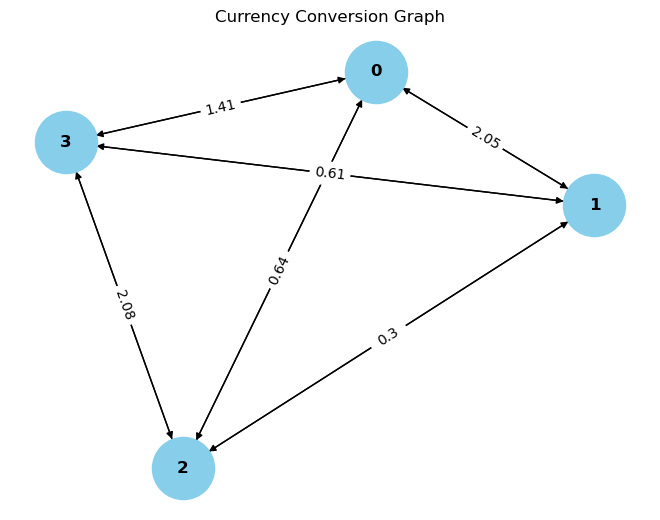

In [141]:
import networkx as nx
import matplotlib.pyplot as plt

# Conversion rates between items (e.g., Pizza Slice, Wasabi Root, Snowball, Shells)
conversion_rates = [
    [1, 0.48, 1.52, 0.71],
    [2.05, 1, 3.26, 1.56],
    [0.64, 0.3, 1, 0.46],
    [1.41, 0.61, 2.08, 1]
]

# Define item names
items = ['Pizza Slice', 'Wasabi Root', 'Snowball', 'Shells']

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
for i, item in enumerate(items):
    G.add_node(i, label=item)

# Add weighted edges to the graph based on conversion rates
for i in range(len(items)):
    for j in range(len(items)):
        if i != j:
            weight = conversion_rates[i][j]
            G.add_edge(i, j, weight=weight)

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # positions for all nodes
labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=12, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Currency Conversion Graph")
plt.show()

In [144]:
def get_all_cycles(graph, start_node):
    cycles = []

    def dfs(node, visited, path):
        visited[node] = True
        path.append(node)

        for neighbor in graph.neighbors(node):
            if neighbor == start_node and len(path) > 2:
                cycles.append(path + [start_node])
            elif not visited[neighbor]:
                dfs(neighbor, visited.copy(), path.copy())

        path.pop()

    visited = {node: False for node in graph.nodes()}
    dfs(start_node, visited, [])

    return cycles

# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
for i, item in enumerate(items):
    G.add_node(i, label=item)

# Add weighted edges to the graph based on conversion rates
for i in range(len(items)):
    for j in range(len(items)):
        if i != j:
            weight = conversion_rates[i][j]
            G.add_edge(i, j, weight=weight)

# Find all cycles starting and ending at the "Shells" node (index 3)
shells_index = 3
cycles = get_all_cycles(G, shells_index)

# Print the cycles
print("Cycles from 'Shells' to 'Shells':")
for cycle in cycles:
    cycle_labels = [G.nodes[node]['label'] for node in cycle]
    print(" -> ".join(cycle_labels))

Cycles from 'Shells' to 'Shells':
Shells -> Pizza Slice -> Wasabi Root -> Snowball -> Shells
Shells -> Pizza Slice -> Wasabi Root -> Shells
Shells -> Pizza Slice -> Snowball -> Wasabi Root -> Shells
Shells -> Pizza Slice -> Snowball -> Shells
Shells -> Wasabi Root -> Pizza Slice -> Snowball -> Shells
Shells -> Wasabi Root -> Pizza Slice -> Shells
Shells -> Wasabi Root -> Snowball -> Pizza Slice -> Shells
Shells -> Wasabi Root -> Snowball -> Shells
Shells -> Snowball -> Pizza Slice -> Wasabi Root -> Shells
Shells -> Snowball -> Pizza Slice -> Shells
Shells -> Snowball -> Wasabi Root -> Pizza Slice -> Shells
Shells -> Snowball -> Wasabi Root -> Shells


In [146]:
def calculate_cycle_conversion(conversion_rates, cycle):
    total_conversion = 1

    for i in range(len(cycle) - 1):
        source = cycle[i]
        target = cycle[i + 1]
        total_conversion *= conversion_rates[source][target]

    # Multiply the conversion rate of the last edge (from last node to the first)
    total_conversion *= conversion_rates[cycle[-1]][cycle[0]]

    return total_conversion

# List of cycles
cycles = [
    [3, 0, 1, 2, 3],
    [3, 0, 1, 3],
    [3, 0, 2, 1, 3],
    [3, 0, 2, 3],
    [3, 1, 0, 2, 3],
    [3, 1, 0, 3],
    [3, 1, 2, 0, 3],
    [3, 1, 2, 3],
    [3, 2, 0, 1, 3],
    [3, 2, 0, 3],
    [3, 2, 1, 0, 3],
    [3, 2, 1, 3]
]

# Convert cycles indices to cycle labels for better readability
cycle_labels = []
for cycle in cycles:
    cycle_labels.append([items[node] for node in cycle])

# Calculate and print the total conversions for each cycle
print("Total conversions for each cycle:")
for i, cycle in enumerate(cycle_labels):
    total_conversion = calculate_cycle_conversion(conversion_rates, cycles[i])
    print(" -> ".join(cycle), "| Total Conversion:", total_conversion)


Total conversions for each cycle:
Shells -> Pizza Slice -> Wasabi Root -> Snowball -> Shells | Total Conversion: 1.01492928
Shells -> Pizza Slice -> Wasabi Root -> Shells | Total Conversion: 1.055808
Shells -> Pizza Slice -> Snowball -> Wasabi Root -> Shells | Total Conversion: 1.0030175999999997
Shells -> Pizza Slice -> Snowball -> Shells | Total Conversion: 0.985872
Shells -> Wasabi Root -> Pizza Slice -> Snowball -> Shells | Total Conversion: 0.8743496000000001
Shells -> Wasabi Root -> Pizza Slice -> Shells | Total Conversion: 0.887855
Shells -> Wasabi Root -> Snowball -> Pizza Slice -> Shells | Total Conversion: 0.90361984
Shells -> Wasabi Root -> Snowball -> Shells | Total Conversion: 0.914756
Shells -> Snowball -> Pizza Slice -> Wasabi Root -> Shells | Total Conversion: 0.9968025600000002
Shells -> Snowball -> Pizza Slice -> Shells | Total Conversion: 0.9451520000000001
Shells -> Snowball -> Wasabi Root -> Pizza Slice -> Shells | Total Conversion: 0.9082319999999999
Shells -> Sno

In [147]:
# Calculate the maximum total conversion among all cycles
max_conversion = float('-inf')
max_cycle = None

for i, cycle in enumerate(cycle_labels):
    total_conversion = calculate_cycle_conversion(conversion_rates, cycles[i])
    if total_conversion > max_conversion:
        max_conversion = total_conversion
        max_cycle = cycle

# Print the maximum total conversion and the corresponding cycle
print("Maximum total conversion:", max_conversion)
print("Corresponding cycle:", " -> ".join(max_cycle))

Maximum total conversion: 1.055808
Corresponding cycle: Shells -> Pizza Slice -> Wasabi Root -> Shells


In [137]:
from typing import Tuple, List
from math import log

rates = [
    [1, 0.48, 1.52, 0.71],
    [2.05, 1, 3.26, 1.56],
    [0.64, 0.3, 1, 0.46],
    [1.41, 0.61, 2.08, 1]
]

currencies = ('Pizza', 'Wasabi', 'Snowball', 'Shells')


def negate_logarithm_convertor(graph: Tuple[Tuple[float]]) -> List[List[float]]:
    ''' log of each rate in graph and negate it'''
    result = [[-log(edge) for edge in row] for row in graph]
    return result


def arbitrage(currency_tuple: tuple, rates_matrix: Tuple[Tuple[float, ...]]):
    ''' Calculates arbitrage situations and prints out the details of this calculations'''

    trans_graph = negate_logarithm_convertor(rates_matrix)

    # Pick any source vertex -- we can run Bellman-Ford from any vertex and get the right result

    source = 0
    n = len(trans_graph)
    min_dist = [float('inf')] * n

    pre = [-1] * n
    
    min_dist[source] = source

    # 'Relax edges |V-1| times'
    for _ in range(n-1):
        for source_curr in range(n):
            for dest_curr in range(n):
                if min_dist[dest_curr] > min_dist[source_curr] + trans_graph[source_curr][dest_curr]:
                    min_dist[dest_curr] = min_dist[source_curr] + trans_graph[source_curr][dest_curr]
                    pre[dest_curr] = source_curr

    # if we can still relax edges, then we have a negative cycle
    for source_curr in range(n):
        for dest_curr in range(n):
            if min_dist[dest_curr] > min_dist[source_curr] + trans_graph[source_curr][dest_curr]:
                # negative cycle exists, and use the predecessor chain to print the cycle
                print_cycle = [dest_curr, source_curr]
                # Start from the source and go backwards until you see the source vertex again or any vertex that already exists in print_cycle array
                while pre[source_curr] not in  print_cycle:
                    print_cycle.append(pre[source_curr])
                    source_curr = pre[source_curr]
                print_cycle.append(pre[source_curr])
                print("Arbitrage Opportunity: \n")
                print(" --> ".join([currencies[p] for p in print_cycle[::-1]]))

In [138]:
arbitrage(currencies, rates)

Arbitrage Opportunity: 

Wasabi --> Shells --> Pizza --> Wasabi
